### Exercise 1
<div class="alert-success">

1. Reproject your country's map layers.
2. Plot the reprojected layers
3. Save the reprojected layers as **gpkg**.
    
</div>

In [78]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [79]:
type(countries)

geopandas.geodataframe.GeoDataFrame

<Axes: >

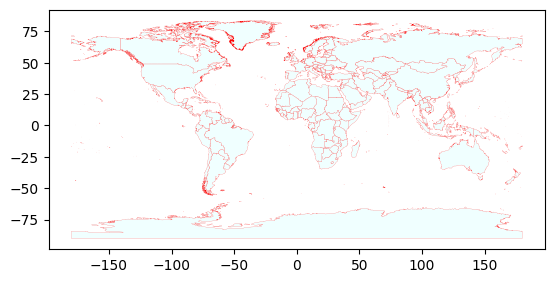

In [80]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

In [81]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [82]:
# what geo?
rivers.geom_type.unique(), cities.geom_type.unique()

(array(['LineString', 'MultiLineString'], dtype=object),
 array(['Point'], dtype=object))

In [83]:
# ONE file - SEVERAL layers
import os

countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

In [84]:
paises = countries.COUNTRY.unique().tolist()
print(paises)

['Aruba (Netherlands)', 'Antigua and Barbuda', 'Afghanistan', 'Algeria', 'Azerbaijan', 'Albania', 'Armenia', 'Andorra', 'Angola', 'American Samoa (US)', 'Argentina', 'Australia', 'Austria', 'Anguilla (UK)', 'Antarctica', 'Bahrain', 'Barbados', 'Botswana', 'Bermuda (UK)', 'Belgium', 'Bahamas', 'Bangladesh', 'Belize', 'Bosnia and Herzegovina', 'Bolivia', 'Myanmar', 'Benin', 'Belarus', 'Solomon Islands', 'Brazil', 'Bhutan', 'Bulgaria', 'Bouvet Island (Norway)', 'Brunei', 'Burundi', 'Canada', 'Cambodia', 'Chad', 'Sri Lanka', 'Congo', 'Democratic Republic of the Congo', 'China', 'Chile', 'Cayman Islands (UK)', 'Cocos (Keeling) Islands (Australia)', 'Cameroon', 'Comoros', 'Colombia', 'Northern Mariana Islands (US)', 'Costa Rica', 'Central African Republic', 'Cuba', 'Cape Verde', 'Cook Islands (New Zealand)', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica', 'Jarvis Island (US)', 'Dominican Republic', 'Ecuador', 'Egypt', 'Ireland', 'Equatorial Guinea', 'Estonia', 'Eritrea', 'El Salvador', 'Ethiopi

In [85]:
usa=countries[countries.COUNTRY=='United States']

In [86]:
usa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [87]:
# check units of measurement
usa.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [88]:
# is this CRS projected?
usa.crs.is_projected

False

**1. Reproject your country's map layers.**


In [89]:
#CRS recommended dor USA (meters:5070):se confirma que las coordenadas están en metros.
usa.to_crs(5070).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [90]:
usa.to_crs(5070).centroid

,0
229,POINT (-700644.82 2429813.928)


**2. Plot the reprojected layers**

<Axes: >

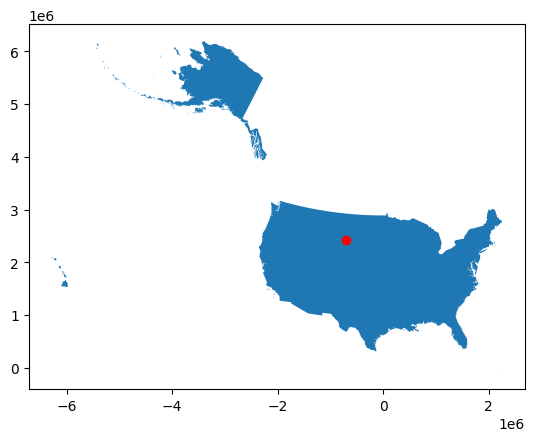

In [91]:
# replotting:
base5070 = usa.to_crs(5070).plot()
usa.to_crs(5070).centroid.plot(color='red', ax=base5070)

In [92]:
cities_usa_5070 = cities[cities.COUNTRY == 'United States'].to_crs(5070)

In [93]:
# Recorta los ríos a la extensión de EE. UU.
riversUSA_clipped = gpd.clip(rivers, usa)

# Reproyecta USA al CRS 5070
usa_5070 = usa.to_crs(5070)

# Reproyecta los ríos recortados al mismo CRS
rivers_usa_5070 = riversUSA_clipped.to_crs(usa_5070.crs)

**3. Save the reprojected layers as gpkg**.

In [94]:
import os

# Guardar los datos en un archivo GeoPackage
usa_5070.to_file(os.path.join("maps", "usaMaps_5070.gpkg"), layer='country', driver="GPKG")
cities_usa_5070.to_file(os.path.join("maps", "usaMaps_5070.gpkg"), layer='cities', driver="GPKG")
rivers_usa_5070.to_file(os.path.join("maps", "usaMaps_5070.gpkg"), layer='rivers', driver="GPKG")
# usa_5070.centroid.to_file(os.path.join("maps", "usaMaps_5070.gpkg"), layer='centroid', driver="GPKG")

### Exercise 2
<div class="alert-success">

1. Find the airports for your country [here](https://ourairports.com/data/). The data is in a CSV file.
2. Create projected layer of airports.
3. Plot all the layers and airports on top.
    
</div>

**1. Find the airports for your country here. The data is in a CSV file.**

In [141]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","airports.csv"))
# Filtra por EE.UU.
infoairports = infoairports[infoairports["iso_country"] == "US"]
# some rows
infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,NaN,NaN,K00A,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,NaN,NaN,00AA,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,NaN,NaN,00AK,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,NaN,NaN,00AL,00AL,NaN,NaN,NaN
82310,26367,Z93,small_airport,Copper Center 2 Airport,61.943713,-145.299398,1150.0,NaN,US,US-AK,Copper Center,no,NaN,CZC,NaN,Z93,NaN,https://en.wikipedia.org/wiki/Copper_Center_Ai...,NaN
82311,26368,Z95,small_airport,Cibecue Airport,34.001681,-110.455115,5037.0,NaN,US,US-AZ,Cibecue,no,NaN,NaN,NaN,Z95,NaN,https://en.wikipedia.org/wiki/Cibecue_Airport,NaN
82857,26369,ZNC,small_airport,Nyac Airport,60.980701,-159.994003,460.0,NaN,US,US-AK,Nyac,no,NaN,ZNC,ZNC,ZNC,NaN,https://en.wikipedia.org/wiki/Nyac_Airport,NaN
83096,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,NaN,US,US-TX,Blum,no,NaN,NaN,87TX,87TX,NaN,NaN,NaN


In [142]:
infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'icao_code', 'iata_code',
       'gps_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [143]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32098 entries, 0 to 83096
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           32098 non-null  object 
 1   type           32098 non-null  object 
 2   latitude_deg   32098 non-null  float64
 3   longitude_deg  32098 non-null  float64
 4   elevation_ft   30050 non-null  float64
 5   municipality   32042 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.7+ MB


In [144]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

In [145]:
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32098 entries, 0 to 83096
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           32098 non-null  object 
 1   type           32098 non-null  object 
 2   latitude_deg   32098 non-null  float64
 3   longitude_deg  32098 non-null  float64
 4   elevation_ft   30050 non-null  float64
 5   municipality   32042 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.7+ MB


**2. (Create projected layer of airports) y 3. (Plot all the layers and airports on top.)**

<Axes: >

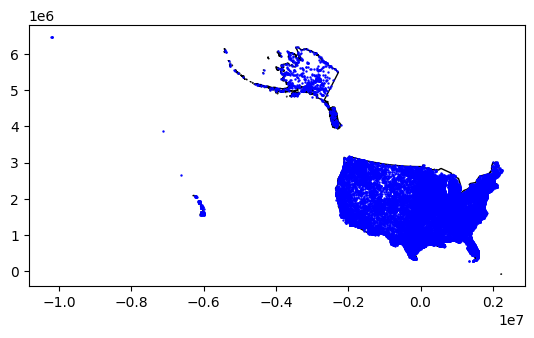

In [146]:
# Graficar el mapa base de USA (en CRS 5070)
base = usa_5070.plot(color='white', edgecolor='black')

# Reproyectar los aeropuertos a CRS 5070
infoairports_5070 = gpd.GeoDataFrame(
    infoairports,
    geometry=gpd.points_from_xy(infoairports.longitude_deg, infoairports.latitude_deg),
    crs=4326  # CRS original geográfico (lat/lon)
).to_crs(5070)

# Graficar los aeropuertos sobre el mapa base
infoairports_5070.plot(ax=base, color='blue', markersize=0.5)

In [147]:
infoairports_5070['type'].value_counts()

,count
type,
small_airport,15225
heliport,8148
closed,7141
medium_airport,832
seaplane_base,652
large_airport,71
balloonport,29


In [148]:
infoairports_5070.rename(columns={'type': 'kind'}, inplace=True)

### Exercise 3

<div class="alert-success">
    
1. Check if your country is a polygon or multipolygon.
    
2. Recover just the boundaries of that country.
    
3. Turn the boundary into a GDF.
</div>

Sabemos que USA es un **multipoligono**

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [152]:
usa_5070

,COUNTRY,geometry
229,United States,"MULTIPOLYGON (((-2397308.957 4415014.136, -239..."


In [ ]:
usa_5070.boundary

,0
229,"MULTILINESTRING ((-2397308.957 4415014.136, -2..."


<Axes: >

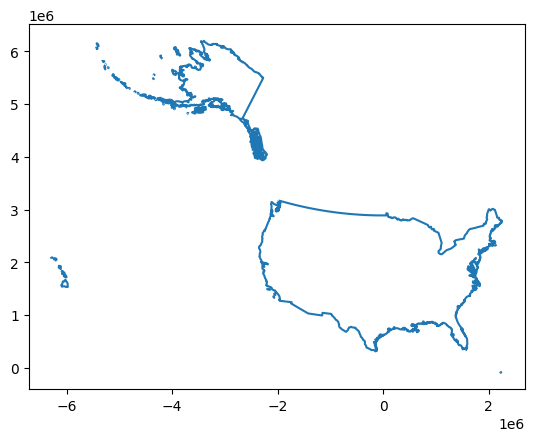

In [ ]:
usa_5070.boundary.plot()

In [ ]:
type(usa_5070.boundary)

geopandas.geoseries.GeoSeries

In [ ]:
usa_5070.boundary.to_frame()

,0
229,"MULTILINESTRING ((-2397308.957 4415014.136, -2..."


In [ ]:
usa_5070.boundary.to_frame().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 229 to 229
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


In [ ]:
# conversion
usa_border = usa_5070.boundary.to_frame()

# new column (optional)
usa_border['name'] = 'USA'

# renaming the geometry column
usa_border.rename(columns={0: 'geometry'}, inplace=True)

# setting the geometry (the name is not enough)
usa_border = usa_border.set_geometry("geometry")

# verifying CRS
usa_border.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
usa_border

,geometry,name
229,"MULTILINESTRING ((-2397308.957 4415014.136, -2...",USA


In [ ]:
usa_5070.geom_type.unique()

array(['MultiPolygon'], dtype=object)

### Exercise 4

<div class="alert-success">

1. Look for sub administrative divisions of your country
2. Check all the CRSs of those divisions
3. If you find one CRS is missing, fill the CRS with the right projection. If not, just state nothing is to be done.
</div>

In [59]:
us_regiones=gpd.read_file(os.path.join("maps","cb_2018_us_region_500k.shp"))
us_zonasurbanas=gpd.read_file(os.path.join("maps","cb_2018_us_ua10_500k.shp"))

In [60]:
type(us_regiones), type(us_zonasurbanas)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [61]:
us_regiones.geometry.head()

,geometry
0,"MULTIPOLYGON (((-68.27472 44.25868, -68.27144 ..."
1,"MULTIPOLYGON (((-82.73571 41.60336, -82.73392 ..."
2,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."
3,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ..."


In [62]:
us_zonasurbanas.geometry.head()

,geometry
0,"MULTIPOLYGON (((-110.81345 32.1191, -110.79879..."
1,"MULTIPOLYGON (((-120.5461 41.51264, -120.54594..."
2,"MULTIPOLYGON (((-90.36678 41.53636, -90.36462 ..."
3,"MULTIPOLYGON (((-77.50746 39.71577, -77.50605 ..."
4,"MULTIPOLYGON (((-85.01158 41.593, -85.00589 41..."


In [63]:
us_regiones.crs, us_zonasurbanas.crs

(<Geographic 2D CRS: EPSG:4269>
 Name: NAD83
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin 

<Axes: >

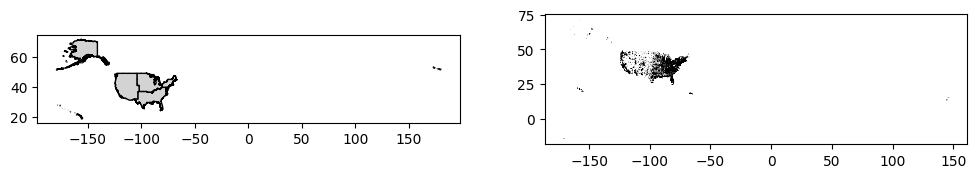

In [64]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

us_regiones.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
us_zonasurbanas.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [65]:
## uncomment this to see the error message
# us_regiones.to_crs(5641)

In [66]:
# set as unprojected
us_regiones.crs = "EPSG:4326"
us_zonasurbanas.crs = "EPSG:4326"

In [67]:
us_regiones=us_regiones.to_crs(5641)
us_zonasurbanas=us_zonasurbanas.to_crs(5641)

In [68]:
us_regiones.to_file(os.path.join("maps","usaMaps_5070.gpkg"), layer='regiones', driver="GPKG")
us_zonasurbanas.to_file(os.path.join("maps","usaMaps_5070.gpkg"), layer='zonas urbanas', driver="GPKG")

### Exercise 5

<div class="alert-success">

1. Transform the co2 and forest variables.
2. Discretize the result chosen.
3. Make the maps for the co2 and forest variables.
4. Add another variable (merge) from the web (or any other source). Transform it , discretize it, and map it.
   
    
</div>

In [70]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [71]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

,Country,Officialstatename,InternetccTLD,iso2,iso3,fragility,co2,region,ForestRev_gdp
0,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,105.0,7893000.0,SOUTH ASIA,0.20
1,ALBANIA,The Republic of Albania,.al,AL,ALB,58.9,3794000.0,EUROPE,0.18
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA,75.4,151633000.0,AFRICA,0.10
3,ANGOLA,The Republic of Angola,.ao,AO,AGO,87.8,19362000.0,AFRICA,0.36
4,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG,54.4,729000.0,CENTRAL AMERICA AND THE CARIBBEAN,0.00


In [72]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [73]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

In [74]:
onlyFragilCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [75]:
# and here
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

In [97]:
# !pip install thefuzz

In [101]:
pip install thefuzz[speedup]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.2 MB/s eta 0:00:00


In [102]:
pip install thefuzz

In [103]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)',
  ('SOUTH GEORGIA AND THE SOUTH SANDWICH IS (UK)', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('DOMINICAN REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH 

In [104]:
# keeping high scores

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('NORTHERN MARIANA ISLANDS (THE)', ('NORTHERN MARIANA ISLANDS (US)', 91)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZ

In [105]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)': 'NORTHERN MARIANA ISLANDS (US)',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'AMERICAN SAMOA (US)',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'U

In [106]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('AFGHANISTAN', ('Afghanistan', 100)),
 ('ALBANIA', ('Albania', 100)),
 ('ALGERIA', ('Algeria', 100)),
 ('AMERICAN SAMOA (US)', ('American Samoa (US)', 100)),
 ('ANGOLA', ('Angola', 100)),
 ('ANTIGUA AND BARBUDA', ('Antigua and Barbuda', 100)),
 ('ARGENTINA', ('Argentina', 100)),
 ('ARMENIA', ('Armenia', 100)),
 ('AUSTRALIA', ('Australia', 100)),
 ('AUSTRIA', ('Austria', 100)),
 ('AZERBAIJAN', ('Azerbaijan', 100)),
 ('BAHAMAS', ('Bahamas', 100)),
 ('BAHRAIN', ('Bahrain', 100)),
 ('BANGLADESH', ('Bangladesh', 100)),
 ('BARBADOS', ('Barbados', 100)),
 ('BELARUS', ('Belarus', 100)),
 ('BELGIUM', ('Belgium', 100)),
 ('BELIZE', ('Belize', 100)),
 ('BENIN', ('Benin', 100)),
 ('BHUTAN', ('Bhutan', 100)),
 ('BOLIVIA', ('Bolivia', 100)),
 ('BOSNIA AND HERZEGOVINA', ('Bosnia and Herzegovina', 100)),
 ('BOTSWANA', ('Botswana', 100)),
 ('BRAZIL', ('Brazil', 100)),
 ('BRUNEI', ('Brunei', 100)),
 ('BULGARIA', ('Bulgaria', 100)),
 ('BURKINA FASO', ('Burkina Faso', 100)),
 ('BURUNDI', ('Burundi', 100

In [108]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|SWA|KOR')]

,COUNTRY,geometry


In [109]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('AFGHANISTAN', ('Afghanistan', 100)),
 ('ALBANIA', ('Albania', 100)),
 ('ALGERIA', ('Algeria', 100)),
 ('AMERICAN SAMOA (US)', ('American Samoa (US)', 100)),
 ('ANGOLA', ('Angola', 100)),
 ('ANTIGUA AND BARBUDA', ('Antigua and Barbuda', 100)),
 ('ARGENTINA', ('Argentina', 100)),
 ('ARMENIA', ('Armenia', 100)),
 ('AUSTRALIA', ('Australia', 100)),
 ('AUSTRIA', ('Austria', 100)),
 ('AZERBAIJAN', ('Azerbaijan', 100)),
 ('BAHAMAS', ('Bahamas', 100)),
 ('BAHRAIN', ('Bahrain', 100)),
 ('BANGLADESH', ('Bangladesh', 100)),
 ('BARBADOS', ('Barbados', 100)),
 ('BELARUS', ('Belarus', 100)),
 ('BELGIUM', ('Belgium', 100)),
 ('BELIZE', ('Belize', 100)),
 ('BENIN', ('Benin', 100)),
 ('BHUTAN', ('Bhutan', 100)),
 ('BOLIVIA', ('Bolivia', 100)),
 ('BOSNIA AND HERZEGOVINA', ('Bosnia and Herzegovina', 100)),
 ('BOTSWANA', ('Botswana', 100)),
 ('BRAZIL', ('Brazil', 100)),
 ('BRUNEI', ('Brunei', 100)),
 ('BULGARIA', ('Bulgaria', 100)),
 ('BURKINA FASO', ('Burkina Faso', 100)),
 ('BURUNDI', ('Burundi', 100

In [110]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'AFGHANISTAN': 'Afghanistan',
 'ALBANIA': 'Albania',
 'ALGERIA': 'Algeria',
 'AMERICAN SAMOA (US)': 'American Samoa (US)',
 'ANGOLA': 'Angola',
 'ANTIGUA AND BARBUDA': 'Antigua and Barbuda',
 'ARGENTINA': 'Argentina',
 'ARMENIA': 'Armenia',
 'AUSTRALIA': 'Australia',
 'AUSTRIA': 'Austria',
 'AZERBAIJAN': 'Azerbaijan',
 'BAHAMAS': 'Bahamas',
 'BAHRAIN': 'Bahrain',
 'BANGLADESH': 'Bangladesh',
 'BARBADOS': 'Barbados',
 'BELARUS': 'Belarus',
 'BELGIUM': 'Belgium',
 'BELIZE': 'Belize',
 'BENIN': 'Benin',
 'BHUTAN': 'Bhutan',
 'BOLIVIA': 'Bolivia',
 'BOSNIA AND HERZEGOVINA': 'Bosnia and Herzegovina',
 'BOTSWANA': 'Botswana',
 'BRAZIL': 'Brazil',
 'BRUNEI': 'Brunei',
 'BULGARIA': 'Bulgaria',
 'BURKINA FASO': 'Burkina Faso',
 'BURUNDI': 'Burundi',
 'CABO VERDE': 'Cape Verde',
 'CAMBODIA': 'Cambodia',
 'CAMEROON': 'Cameroon',
 'CANADA': 'Canada',
 'CENTRAL AFRICAN REPUBLIC': 'Central African Republic',
 'CHAD': 'Chad',
 'CHILE': 'Chile',
 'CHINA': 'China',
 'COLOMBIA': 'Colombia',
 'COMOROS':

In [111]:
# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

In [112]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            170 non-null    object  
 1   geometry           170 non-null    geometry
 2   Officialstatename  170 non-null    object  
 3   InternetccTLD      170 non-null    object  
 4   iso2               169 non-null    object  
 5   iso3               170 non-null    object  
 6   fragility          170 non-null    float64 
 7   co2                170 non-null    float64 
 8   region             170 non-null    object  
 9   ForestRev_gdp      170 non-null    float64 
dtypes: float64(3), geometry(1), object(6)
memory usage: 13.4+ KB


In [113]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [114]:
pd.melt(theMapAndData[DataNames])

,variable,value
0,fragility,54.40
1,fragility,105.00
2,fragility,75.40
3,fragility,73.20
4,fragility,58.90
...,...,...
505,ForestRev_gdp,4.45
506,ForestRev_gdp,1.61
507,ForestRev_gdp,2.65
508,ForestRev_gdp,0.39


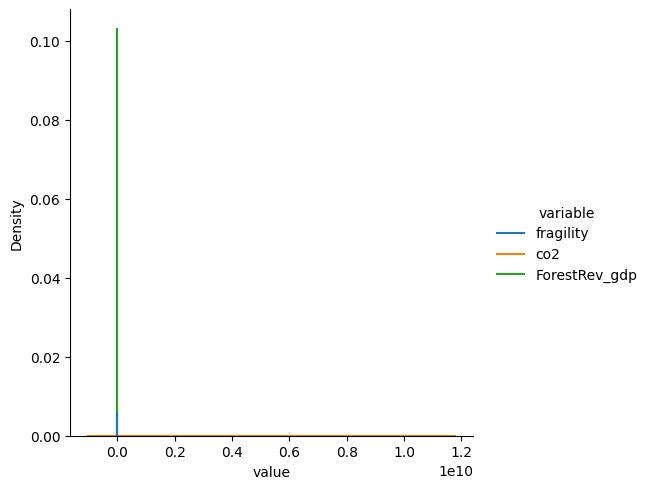

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [116]:
pip install -U scikit-learn

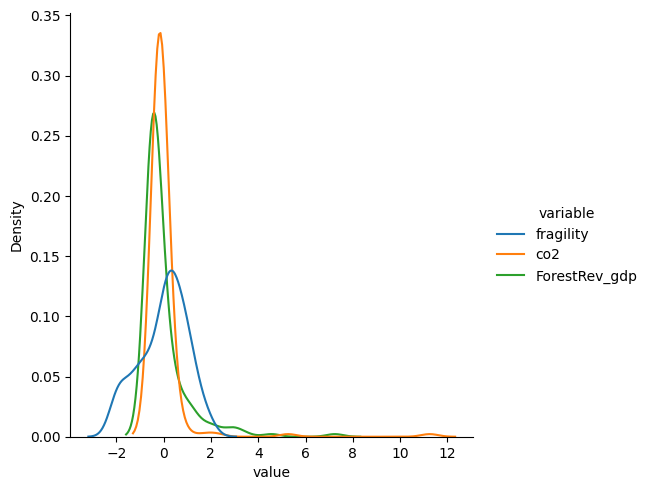

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

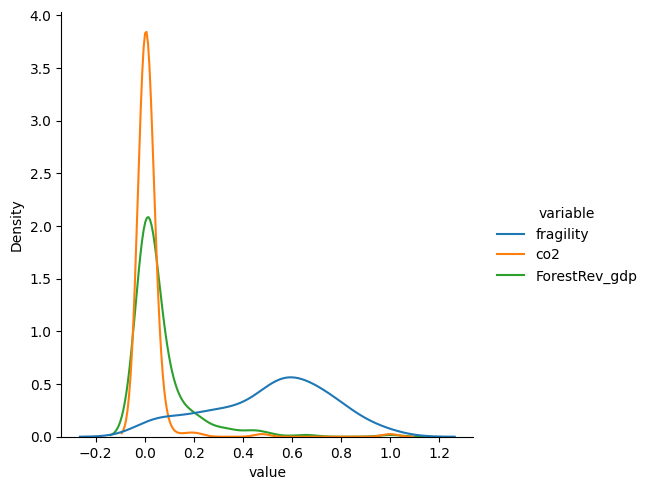

In [118]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

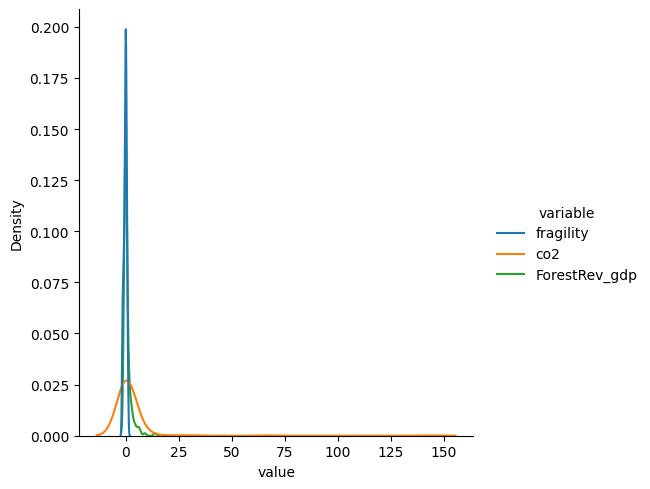

In [119]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

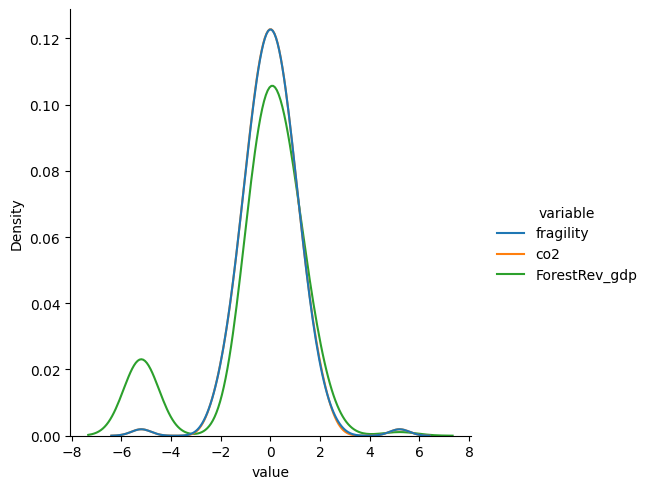

In [120]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [125]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

In [128]:
pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 4.7 MB/s eta 0:00:00


In [129]:
pip show numba mapclassify numpy

Name: numba
Version: 0.60.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, cuml-cu12, dask-cuda, distributed-ucxx-cu12, librosa, numba-cuda, pynndescent, shap, stumpy, umap-learn
---
Name: mapclassify
Version: 2.9.0
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: 
---
Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:



In [130]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [131]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

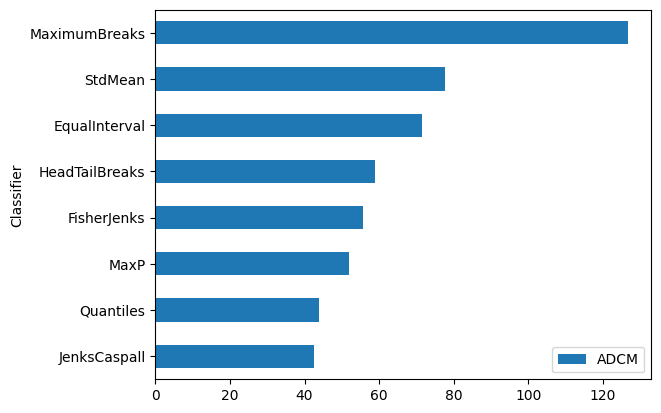

In [132]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [133]:
theMapAndData['fragility_Qt_jc5'] = jc5.yb

In [134]:
# there you are
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

,fragility_Qt,fragility_Qt_jc5
0,-0.559624,1
1,1.824703,4
2,0.281088,2
3,0.209853,2
4,-0.451880,1


In [135]:
indexList=['fragility_Qt_jc5'] # add more?
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,fragility_Qt_jc5,fragility_Qt
,,mean
0,0,-1.613560
1,1,-0.609374
2,2,0.023169
3,3,0.664470
4,4,1.685858


In [136]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat
0,-0.559624,1,1_Good
1,1.824703,4,4_Poor
2,0.281088,2,2_Middle
3,0.209853,2,2_Middle
4,-0.451880,1,1_Good
5,-0.203997,2,2_Middle
6,0.942215,3,3_Bad
7,-0.310136,1,1_Good
8,-0.796394,1,1_Good
9,-1.959964,0,0_Great


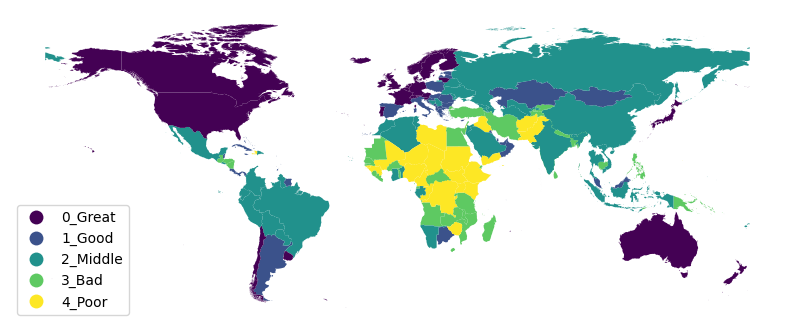

In [137]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

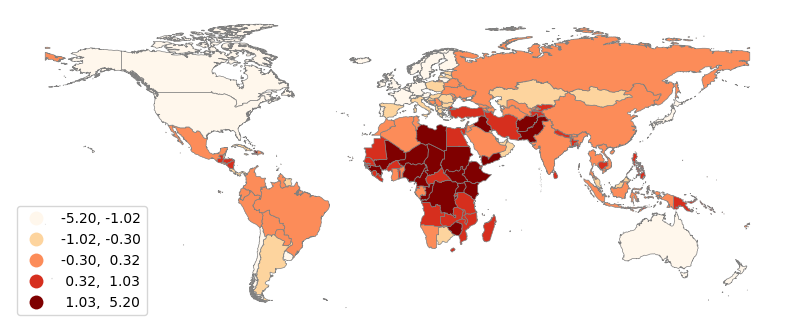

In [138]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [139]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")